In [1]:
from unityagents import UnityEnvironment
from collections import deque
import numpy as np
import dqn_runner
%load_ext autoreload
%autoreload 2

env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

%matplotlib inline

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.89
Episode 200	Average Score: 4.09
Episode 300	Average Score: 7.65
Episode 400	Average Score: 9.27
Episode 500	Average Score: 11.36
Episode 552	Average Score: 13.07
Environment solved in 452 episodes!	Average Score: 13.07


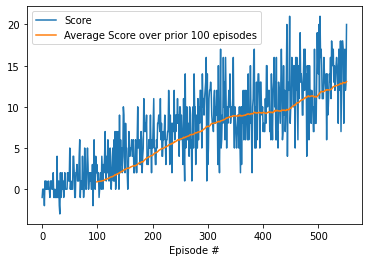

In [2]:
import dqn_agent
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

dqn_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dqn_checkpoint.pth')

dqn_runner.plot_scores(dqn_scores)

Episode 100	Average Score: 0.56
Episode 200	Average Score: 3.91
Episode 300	Average Score: 7.95
Episode 400	Average Score: 10.95
Episode 500	Average Score: 12.49
Episode 509	Average Score: 13.03
Environment solved in 409 episodes!	Average Score: 13.03


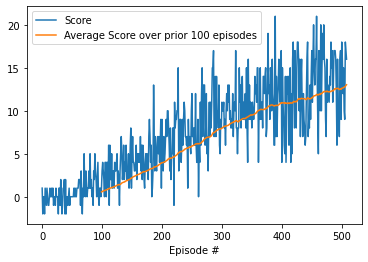

In [3]:
import double_dqn_agent
Agent = double_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

double_dqn_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='double_dqn_checkpoint.pth')

dqn_runner.plot_scores(double_dqn_scores)

Episode 100	Average Score: 0.28
Episode 200	Average Score: 4.70
Episode 300	Average Score: 8.13
Episode 400	Average Score: 11.72
Episode 445	Average Score: 13.01
Environment solved in 345 episodes!	Average Score: 13.01


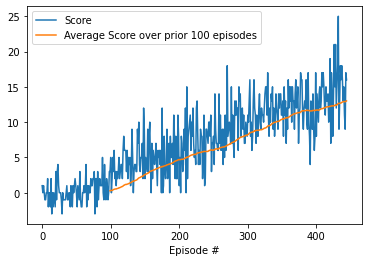

In [4]:
import dueling_model
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

dueling_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dueling_dqn_checkpoint.pth')

dqn_runner.plot_scores(dueling_scores)

Episode 100	Average Score: 0.57
Episode 200	Average Score: 3.46
Episode 300	Average Score: 8.23
Episode 400	Average Score: 11.06
Episode 500	Average Score: 11.92
Episode 570	Average Score: 13.03
Environment solved in 470 episodes!	Average Score: 13.03


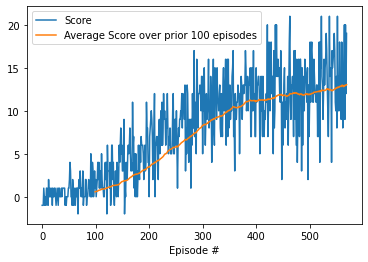

In [5]:
import per_dqn_agent
Agent = per_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

per_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='per_dqn_checkpoint.pth')

dqn_runner.plot_scores(per_scores)

Episode 100	Average Score: 1.01
Episode 200	Average Score: 4.83
Episode 300	Average Score: 7.30
Episode 400	Average Score: 10.77
Episode 500	Average Score: 11.43
Episode 552	Average Score: 13.09
Environment solved in 452 episodes!	Average Score: 13.09


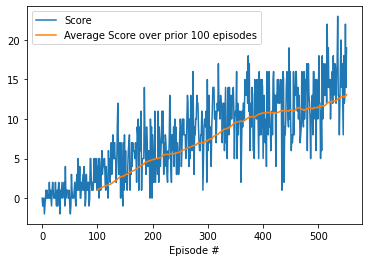

In [6]:
import double_dqn_agent
import per_dqn_agent
import model

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0)

double_per_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='double_per_dqn_checkpoint.pth')

dqn_runner.plot_scores(double_per_scores)


Episode 100	Average Score: 0.85
Episode 200	Average Score: 3.59
Episode 300	Average Score: 8.09
Episode 400	Average Score: 10.72
Episode 500	Average Score: 11.79
Episode 530	Average Score: 13.02
Environment solved in 430 episodes!	Average Score: 13.02


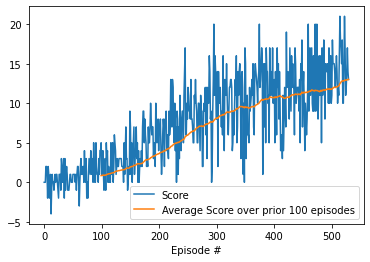

In [7]:
import double_dqn_agent
import per_dqn_agent
import dueling_model

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

dueling_double_per_scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dueling_double_per_dqn_checkpoint.pth')

dqn_runner.plot_scores(dueling_double_per_scores)


In [16]:
dueling_double_per_scores
import pickle
with open('scores.p', 'wb') as file:
    pickle.dump([dqn_scores, double_dqn_scores, dueling_scores, per_scores, double_per_scores, dueling_double_per_scores], file)

In [21]:
with open('scores.p', 'rb') as file:
    score_lists = pickle.load( file)


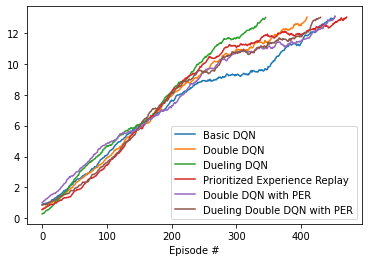

In [28]:
import matplotlib.pyplot as plt
n=100
[ave_dqn_scores, ave_double_dqn_scores, ave_dueling_scores, ave_per_scores, ave_double_per_scores, ave_dueling_double_per_scores] = \
[np.correlate(scores, np.ones(n)/n, mode='valid') for scores in score_lists]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(ave_dqn_scores)), ave_dqn_scores, label="Basic DQN")
plt.plot(np.arange(len(ave_double_dqn_scores)), ave_double_dqn_scores, label="Double DQN")
plt.plot(np.arange(len(ave_dueling_scores)), ave_dueling_scores, label="Dueling DQN")
plt.plot(np.arange(len(ave_per_scores)), ave_per_scores, label="Prioritized Experience Replay")
plt.plot(np.arange(len(ave_double_per_scores)), ave_double_per_scores, label="Double DQN with PER")
plt.plot(np.arange(len(ave_dueling_double_per_scores)), ave_dueling_double_per_scores, label="Dueling Double DQN with PER")
plt.xlabel('Episode #')
ax.legend()
plt.show()